# Нейроинформатика. Лабораторная работа 2
### Линейная нейронная сеть. Правило обучения Уидроу-Хоффа

Целью работы является исследование свойств линейной нейронной сети и алгоритмов ее
обучения, применение сети в задачах аппроксимации и фильтрации.

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

Функции сигналов и параметры:

In [ ]:
def in1(t):
    return np.sin(t**2 - 10*t + 3)

def in2(t):
    return np.sin(-2*t**2 + 7*t)

def out(t):
    return np.sin(-2*t**2 + 7*t - np.pi) / 8

h1 = 0.025
h2 = 0.01

range1 = (1, 6)
range2 = (0, 3.5)


### Задание 1
Попробуем предсказать следующий элемент последовательности

Сгенерируем датасет для обучения

In [ ]:
t1 = np.linspace(range1[0], range1[1], int((range1[1] - range1[0]) / h1))
x1 = in1(t1)

In [ ]:
def gen_dataset(x, delay=5):
    x_train = np.array([np.hstack([x[i:i+delay]]) for i in range(len(x) - delay)])
    y_train = x[delay:]
    assert x_train.shape[0] == y_train.shape[0]
    return x_train, y_train

In [ ]:
x_train1, y_train1 = gen_dataset(x1)
x_train1.shape, y_train1.shape

((195, 5), (195,))

Убедимся, что датасеты сгенерились правильно

In [ ]:
x_train1[:3], y_train1[:3]

(array([[ 0.2794155 ,  0.08271696, -0.11603756, -0.30900637, -0.48881774],
        [ 0.08271696, -0.11603756, -0.30900637, -0.48881774, -0.64883879],
        [-0.11603756, -0.30900637, -0.48881774, -0.64883879, -0.78340034]]),
 array([-0.64883879, -0.78340034, -0.88797189]))

Все корректно, можем приступать к обучению перцептрона

In [ ]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(1))

In [ ]:
model1.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

In [ ]:
train_info1 = model1.fit(x_train1, y_train1, batch_size=1, epochs=50)

Epoch 1/50
195/195 [==============================] - 2s 4ms/step - loss: 2.8989 - root_mean_squared_error: 1.7026
Epoch 2/50
195/195 [==============================] - 1s 4ms/step - loss: 1.7062 - root_mean_squared_error: 1.3062
Epoch 3/50
195/195 [==============================] - 0s 2ms/step - loss: 0.9485 - root_mean_squared_error: 0.9739
Epoch 4/50
195/195 [==============================] - 1s 3ms/step - loss: 0.5067 - root_mean_squared_error: 0.7118
Epoch 5/50
195/195 [==============================] - 1s 3ms/step - loss: 0.2672 - root_mean_squared_error: 0.5169
Epoch 6/50
195/195 [==============================] - 1s 3ms/step - loss: 0.1489 - root_mean_squared_error: 0.3859
Epoch 7/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0940 - root_mean_squared_error: 0.3066
Epoch 8/50
195/195 [==============================] - 1s 4ms/step - loss: 0.0686 - root_mean_squared_error: 0.2619
Epoch 9/50
195/195 [==============================] - 1s 4ms/step - loss: 0.0560

In [ ]:
model1.layers[0].get_weights()

[array([[-0.5695189 ],
        [ 0.17684439],
        [ 0.19597706],
        [ 0.33547652],
        [ 0.7909496 ]], dtype=float32), array([-0.00295174], dtype=float32)]

Посмотрим на графики лосса и RMSE

In [ ]:
def plot_metrics(train_info):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    loss_history = train_info.history['loss']
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    loss_history = train_info.history['root_mean_squared_error']
    plt.xlabel('epoch')
    plt.ylabel('rmse')
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.title('RMSE')

    plt.show()

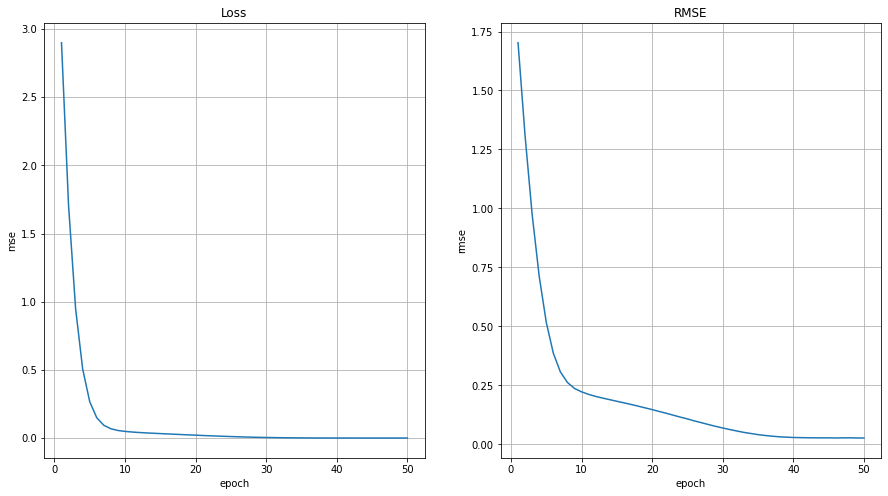

In [ ]:
plot_metrics(train_info1)

Посмотрим на результат работы модели

7/7 [==============================] - 0s 2ms/step


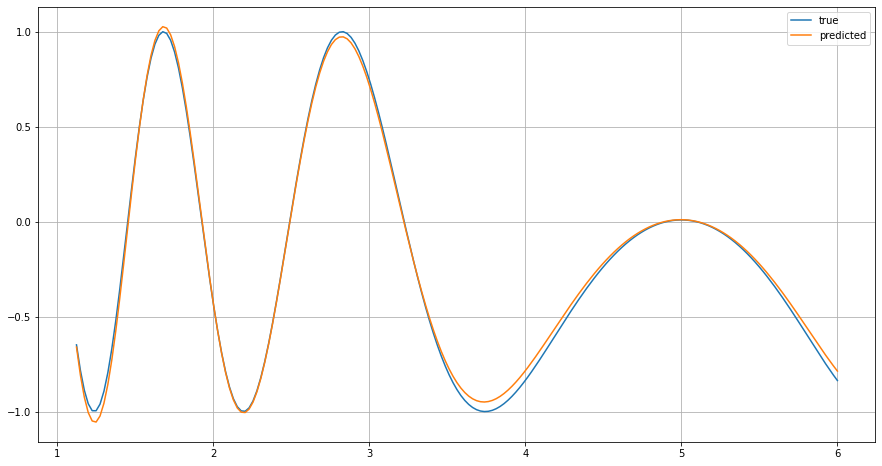

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(t1[5:], x1[5:], label='true')
plt.plot(t1[5:], model1.predict(x_train1), label='predicted')
plt.legend()
plt.grid()
plt.show()

Модель довольно неплохо научилась предсказывать следующую точку

### Задание 2
Попробуем сделать многошаговый прогноз

Сначала обучим модель с задержкой = 3

In [ ]:
x_train2, y_train2 = gen_dataset(x1, delay=3)
x_train2.shape, y_train2.shape

((197, 3), (197,))

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(1))

In [ ]:
model2.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

In [ ]:
train_info2 = model2.fit(x_train2, y_train2, batch_size=1, epochs=100)

Epoch 1/100
197/197 [==============================] - 1s 1ms/step - loss: 0.3995 - root_mean_squared_error: 0.6320
Epoch 2/100
197/197 [==============================] - 0s 2ms/step - loss: 0.1652 - root_mean_squared_error: 0.4065
Epoch 3/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0624 - root_mean_squared_error: 0.2499
Epoch 4/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0235 - root_mean_squared_error: 0.1532
Epoch 5/100
197/197 [==============================] - 0s 1ms/step - loss: 0.0099 - root_mean_squared_error: 0.0993
Epoch 6/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726
Epoch 7/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602
Epoch 8/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551
Epoch 9/100
197/197 [==============================] - 0s 2ms/step - los

In [ ]:
model2.layers[0].get_weights()

[array([[-0.94829816],
        [ 0.92858356],
        [ 0.99817014]], dtype=float32), array([-0.00529915], dtype=float32)]

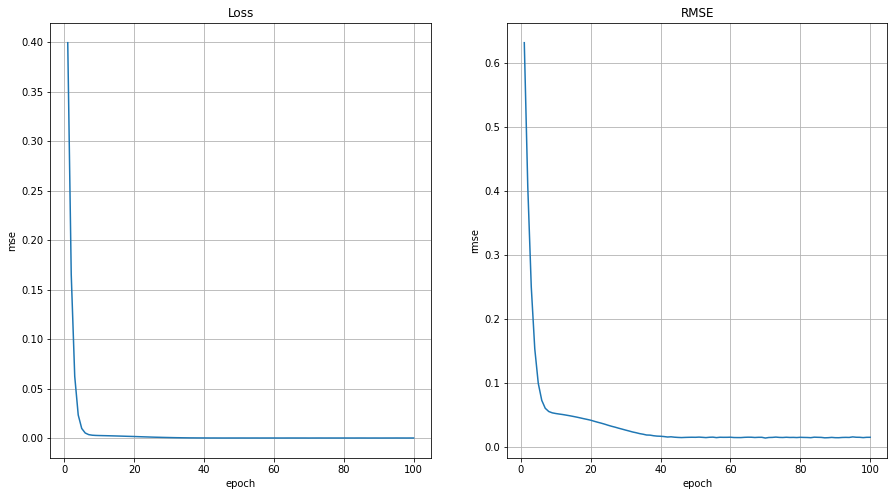

In [ ]:
plot_metrics(train_info2)

Теперь сделаем прогноз на 10 шагов вперед

In [ ]:
t_test = np.linspace(range1[1], range1[1] + 10 * h1, 10)
x_test = in1(t_test)

x_pred = x_train2[-1]
for i in range(10):
    x_pred = np.append(x_pred, model2.predict(np.expand_dims(x_pred[-3:], axis=0)))

1/1 [==============================] - 0s 18ms/step


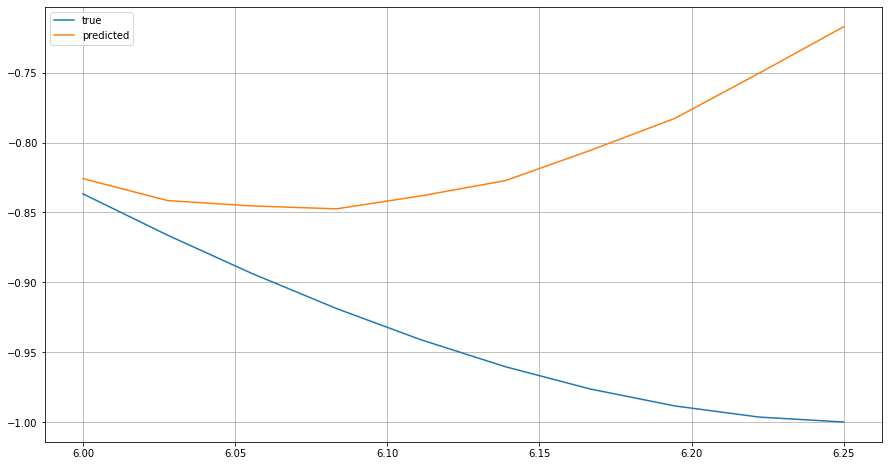

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(t_test, x_test, label='true')
plt.plot(t_test, x_pred[3:], label='predicted')
plt.legend()
plt.grid()
plt.show()

Здесь модель уже справилась похуже. На несколько шагов вперед она смотрит плохо

### Задание 3
Попробуем обучить адаптивный линейный фильтр

In [ ]:
t3 = np.linspace(range2[0], range2[1], int((range2[1] - range2[0]) / h2))
x3 = in2(t3)
y3 = out(t3)

In [ ]:
def gen_dataset_filter(x, y, delay=5):
    x_train = np.array([np.hstack([x[i:i+delay]]) for i in range(len(x) - delay)])
    y_train = y[delay:]
    assert x_train.shape[0] == y_train.shape[0]
    return x_train, y_train

In [ ]:
x_train3, y_train3 = gen_dataset_filter(x3, y3)
x_train3.shape, y_train3.shape

((345, 5), (345,))

Обучаем модель

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(1))

In [ ]:
model3.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

In [ ]:
train_info3 = model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
345/345 [==============================] - 1s 2ms/step - loss: 1.2385 - root_mean_squared_error: 1.1129
Epoch 2/50
345/345 [==============================] - 1s 2ms/step - loss: 0.2425 - root_mean_squared_error: 0.4925
Epoch 3/50
345/345 [==============================] - 0s 1ms/step - loss: 0.0347 - root_mean_squared_error: 0.1863
Epoch 4/50
345/345 [==============================] - 0s 1ms/step - loss: 0.0068 - root_mean_squared_error: 0.0825
Epoch 5/50
345/345 [==============================] - 0s 1ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460
Epoch 6/50
345/345 [==============================] - 0s 1ms/step - loss: 8.9095e-04 - root_mean_squared_error: 0.0298
Epoch 7/50
345/345 [==============================] - 0s 1ms/step - loss: 6.0463e-04 - root_mean_squared_error: 0.0246
Epoch 8/50
345/345 [==============================] - 0s 1ms/step - loss: 5.4232e-04 - root_mean_squared_error: 0.0233
Epoch 9/50
345/345 [==============================] - 0s 1ms/step - 

In [ ]:
model3.layers[0].get_weights()

[array([[-0.35170996],
        [ 0.25001252],
        [ 0.3431131 ],
        [ 0.09131388],
        [-0.45964116]], dtype=float32), array([-0.00181413], dtype=float32)]

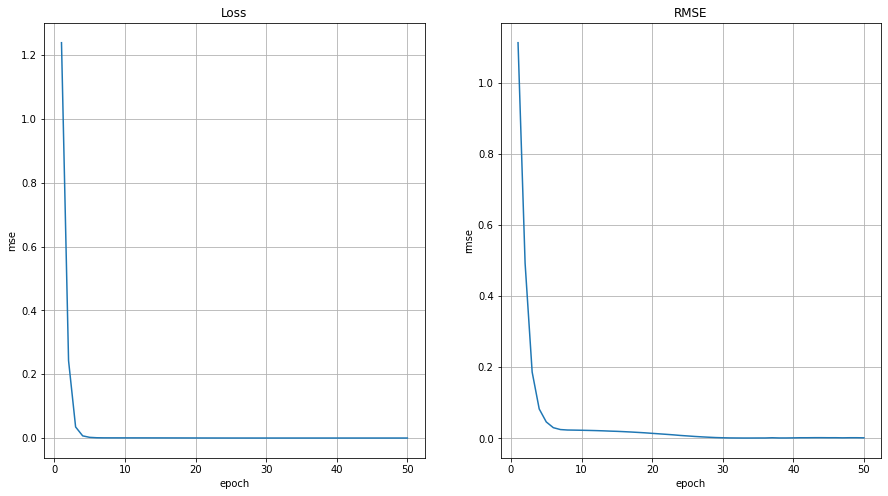

In [ ]:
plot_metrics(train_info3)

Посмотрим на результат модели

11/11 [==============================] - 0s 1ms/step


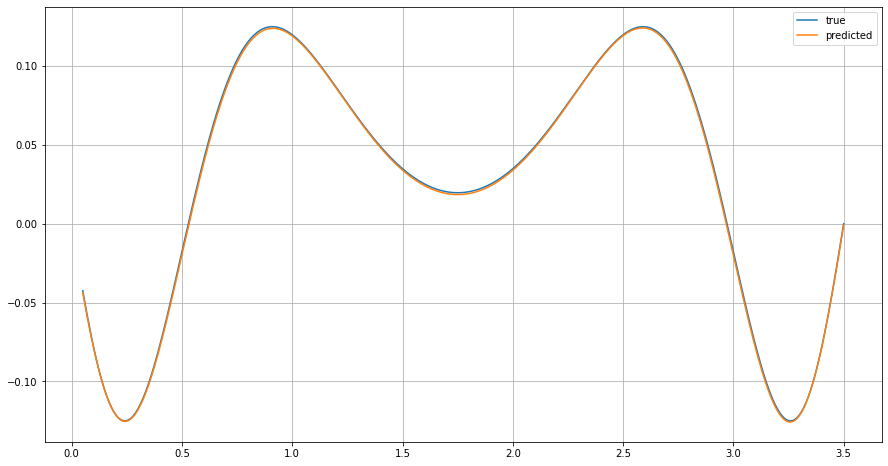

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(t3[5:], out(t3[5:]), label='true')
plt.plot(t3[5:], model3.predict(x_train3), label='predicted')
plt.legend()
plt.grid()
plt.show()

Модель хорошо справилась с предсказанием значения выходного сигнала

# Вывод

В данной работе я еще потренировался в обучении перцептронов. В этот раз я учил модель предсказывать следующее значение последовательности. Выяснил, что перцептрон хорошо учится предсказывать вперед на 1 шаг, но предсказывать на 10 шагов вперед получается плохо (из-за накапливаемой ошибки).

Также я попробовал реализовать свой адаптивный линейный фильтр. Результаты получились хорошие - перцептрон достаточно точно предсказывает значение выходного сигнала